In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os
import sys
import healpy as hp
from healpy.newvisufunc import projview
sys.path.insert(0, '/home/aew492/lss-dipoles')
from tools import load_catalog_as_map, flatten_map

#### parameters

In [17]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
qsodir = '/scratch/aew492/quasars'
G = 20.5

#### final catalog

In [18]:
map_quaia = load_catalog_as_map(os.path.join(qsodir, f'zenodo/quaia_G{G:.1f}.fits'))

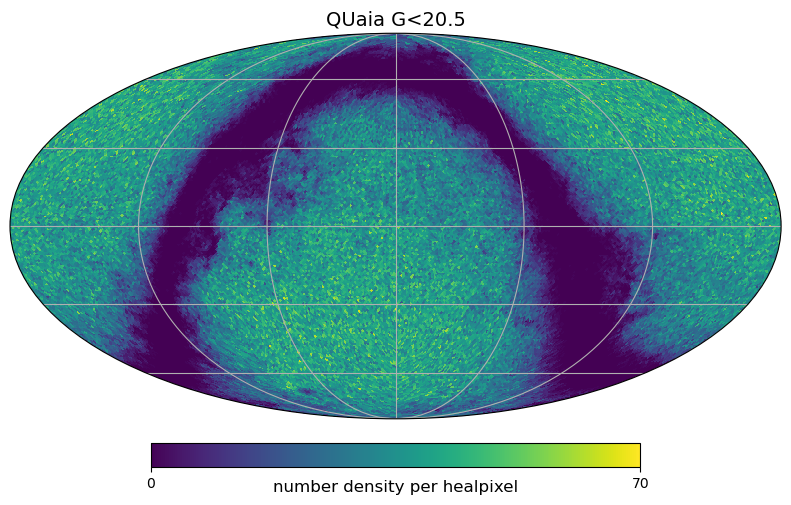

In [19]:
projview(map_quaia, projection_type='mollweide', unit='number density per healpixel',
         title=f'QUaia G<{G:.1f}', graticule=True)

#### old catalog

In [20]:
oldmap_quaia = load_catalog_as_map(os.path.join(qsodir, f'catalogs/catalog_G{G:.1f}.fits'))

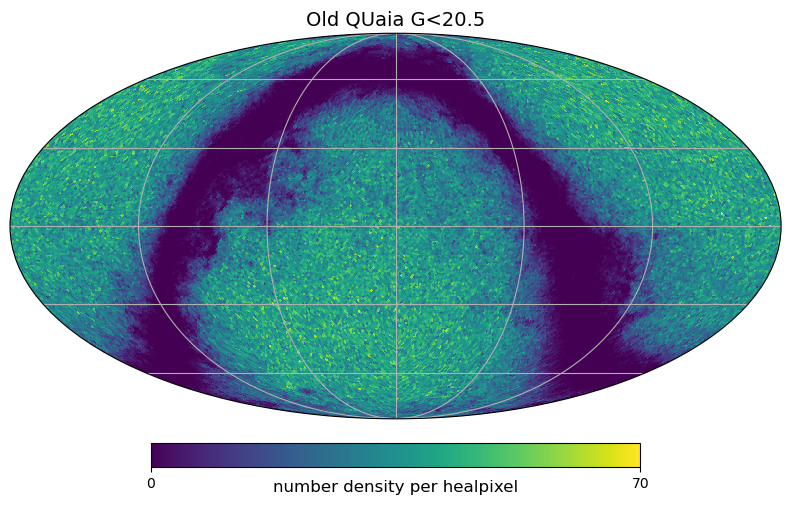

In [21]:
projview(oldmap_quaia, projection_type='mollweide', unit='number density per healpixel',
         title=f'Old QUaia G<{G:.1f}', graticule=True)

#### residuals

In [22]:
res = map_quaia / oldmap_quaia

/state/partition1/job-34933729/ipykernel_1989664/174145367.py:1: RuntimeWarning: invalid value encountered in divide
  res = map_quaia / oldmap_quaia


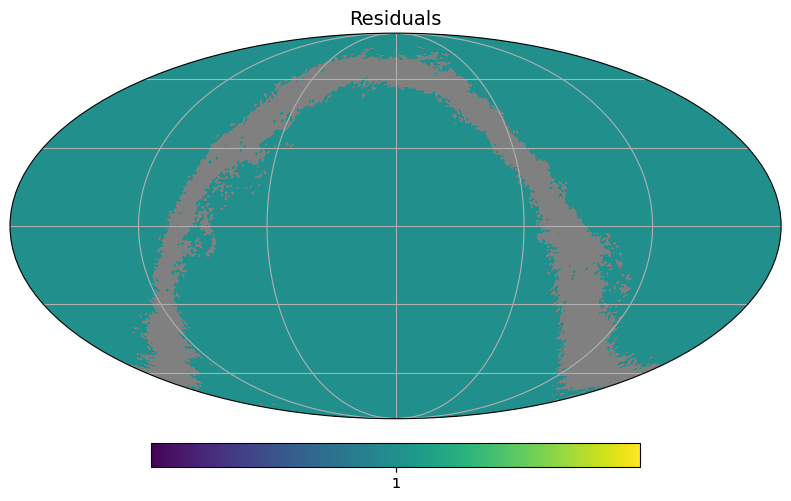

In [23]:
projview(res, projection_type='mollweide', graticule=True, title='Residuals')

#### random catalogs

In [24]:
map_rand = load_catalog_as_map(os.path.join(qsodir, f'zenodo/random_G{G:.1f}_10x.fits'))

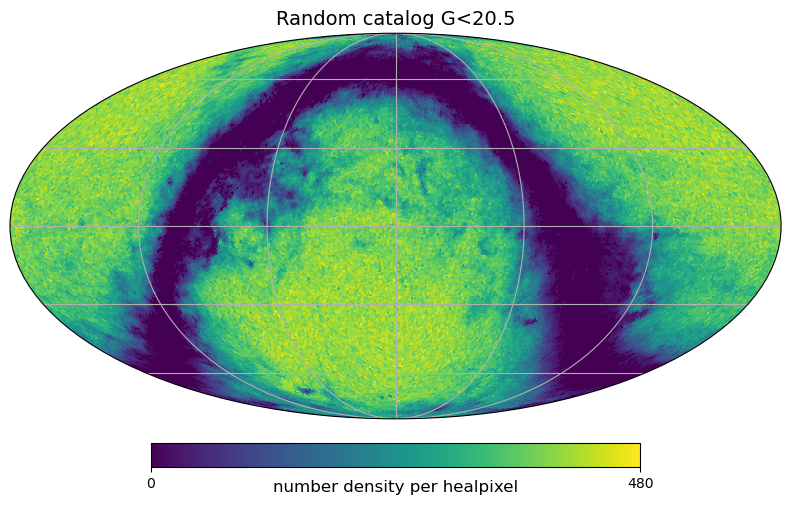

In [25]:
projview(map_rand, projection_type='mollweide', unit='number density per healpixel',
         title=f'Random catalog G<{G:.1f}', graticule=True)

#### selection function

In [26]:
selfunc = Table.read(os.path.join(qsodir, f'zenodo/selection_function_NSIDE{NSIDE}_G{G:.1f}.fits'), format='fits')['T']
selfunc.shape

(48, 1024)

In [27]:
selfunc = np.reshape(selfunc, (selfunc.size,))

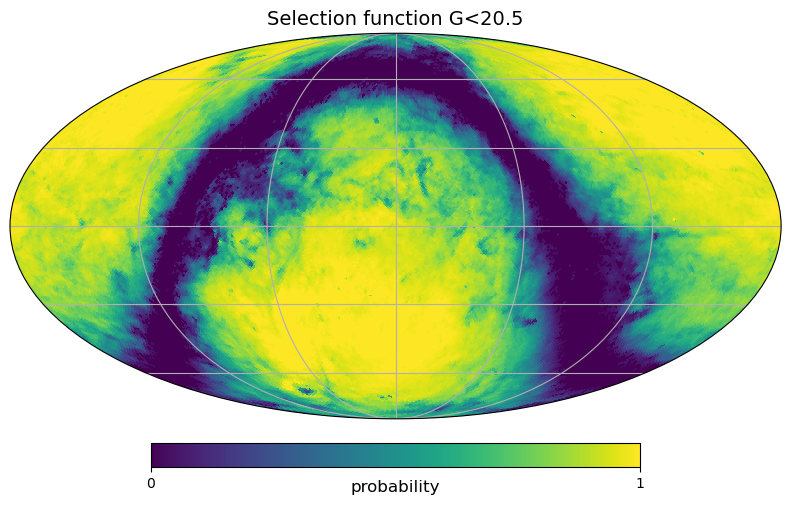

In [28]:
projview(selfunc, unit='probability', projection_type='mollweide', title=f'Selection function G<{G:.1f}',
        graticule=True)